# **UDA  Assignment #3**

**Group: Alyssa Yoonji Bea, Gowtami Khambhampati, Danqing Wang, Kevin Mckinney, Rathi Kannan, Sungsoo Kim, Shreya Bakshi**

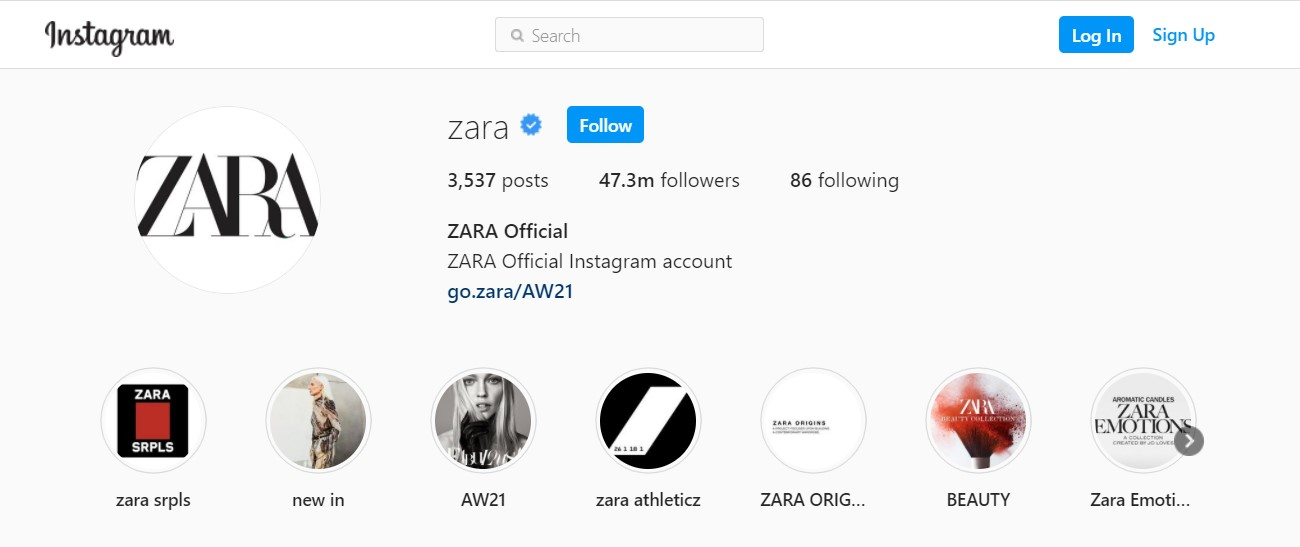

In [ ]:

!pip install instaloader
!pip install google-cloud
!pip install google-cloud-vision
!pip install pyLDAvis

     |████████████████████████████████| 54 kB 1.6 MB/s 
  Created wheel for instaloader: filename=instaloader-4.8.1-py3-none-any.whl size=58722 sha256=7d265893e67dbba2d92f35af00cd0506dfc100e0b6b3df8c23a38eceba039065
  Stored in directory: /root/.cache/pip/wheels/67/cc/31/c4f2a966180c23b0f66985bb9a90c389d447bc1a5ddffd35c9
Successfully built instaloader
     |████████████████████████████████| 370 kB 11.6 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
ERROR: pip's dependency resolver does not currently take into ac

     |████████████████████████████████| 1.7 MB 12.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 62 kB/s 
     |████████████████████████████████| 11.3 MB 39.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=5644887c06a676f0ed11e6c9e213e2dc0222b1f7bfab15b6066d2a134f7f1f42
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [ ]:
import instaloader
from instaloader import Profile
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.cloud import vision
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import os
import ast
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer 
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
#nltk.download('wordnet')
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


**Task A: Get Image Data from Zara Instagram**

In [ ]:
from datetime import datetime
import time

USERNAME = 'zara'
L = instaloader.Instaloader()
L.login('rskim472','12345678!')
posts = instaloader.Profile.from_username(L.context, USERNAME).get_posts()

df = pd.DataFrame(columns=['post_link', 'comment_count','likes_count','caption','is_video','image_link'])
counter = 0
iter = 0
print(posts)
for post in posts:
    shortcode = post.shortcode
    post_link = 'https://instagram.com/p/'+shortcode+'/'
    likes = post.likes
    comments = post.comments
    caption = post.caption
    video = post.is_video
    iter += 1 
    print(str(datetime.now()) + " " + str(counter) + " " + str(iter))
    if not post.is_video:
      image_link = post.url
      counter+=1
      df = df.append({'post_link':post_link, 'comment_count':comments, 'likes_count':likes, 'caption':caption,'image_link':image_link,'is_video':video}, ignore_index=True)

    if counter>=600:
        break
photo_df = df

In [ ]:
photo_df.to_csv('zara_insta_photo_posts.csv')
!ls
from google.colab import files
files.download("zara_insta_photo_posts.csv")

In [ ]:
zara_df = pd.read_csv('zara_insta_photo_posts.csv')
zara_df.head()

**Task B: Get Image Labels from Zara Instagram Links**

In [ ]:
!pip install --upgrade google-cloud-vision

In [ ]:
pip freeze| egrep 'google'

google==2.0.3
google-api-core==2.2.2
google-api-python-client==1.12.8
google-auth==1.35.0
google-auth-httplib2==0.0.4
google-auth-oauthlib==0.4.6
google-cloud==0.34.0
google-cloud-bigquery==1.21.0
google-cloud-bigquery-storage==1.1.0
google-cloud-core==1.0.3
google-cloud-datastore==1.8.0
google-cloud-firestore==1.7.0
google-cloud-language==1.2.0
google-cloud-storage==1.18.1
google-cloud-translate==1.5.0
google-cloud-vision==2.6.2
google-colab @ file:///colabtools/dist/google-colab-1.0.0.tar.gz
google-pasta==0.2.0
google-resumable-media==0.4.1
googleapis-common-protos==1.53.0
googledrivedownloader==0.4
jaxlib @ https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.71+cuda111-cp37-none-manylinux2010_x86_64.whl
pydata-google-auth==1.2.0


In [ ]:
import os
import pandas as pd
from google.colab import files
from google.cloud import vision
from __future__ import print_function

# Upload Vision API Key
files.upload()

# Authenticate Vision API
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="g_vision_key.json"

# Upload Zara Instagram Data
zara_file = files.upload()
zara_df = pd.read_csv('zara_insta_photo_posts.csv',encoding = "ISO-8859-1" ) #photo_df=pd.read_csv('postTaskA.csv',encoding = "ISO-8859-1")

Saving g_vision_key.json to g_vision_key.json


Saving zara_insta_photo_posts.csv to zara_insta_photo_posts.csv


In [ ]:
def get_image_labels(uri):

  client = vision.ImageAnnotatorClient()
  image = vision.Image()
  image.source.image_uri = uri

  response = client.label_detection(image=image)
  annots = response.label_annotations

  descriptions = [anno.description for anno in annots]
  return descriptions

In [ ]:
links_zara = zara_df['image_link']
labels_zara = []

In [ ]:
zara_df.head()

,Unnamed: 0,post_link,comment_count,likes_count,caption,is_video,image_link
0,0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....
1,1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....
2,2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....
3,3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....
4,4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....


In [ ]:
# Get image labels using vision api
for link in links_zara:
  labels_zara.append(get_image_labels(link))

In [ ]:
labels_zara

[['Sky',
  'Hat',
  'People in nature',
  'Sun hat',
  'Happy',
  'Gesture',
  'Travel',
  'Fun',
  'Military camouflage',
  'Landscape'],
 ['Smile',
  'Facial expression',
  'Sky',
  'Happy',
  'Flash photography',
  'Travel',
  'People in nature',
  'Fun',
  'Leisure',
  'Family taking photos together'],
 ['Outerwear',
  'Arm',
  'Neck',
  'Sleeve',
  'Gesture',
  'Collar',
  'Jacket',
  'Overcoat',
  'Street fashion',
  'Fashion design'],
 ['Face',
  'Smile',
  'Head',
  'Outerwear',
  'Arm',
  'Eye',
  'Product',
  'Organ',
  'Human body',
  'Sleeve'],
 ['Toy',
  'Sleeve',
  'Waist',
  'Collar',
  'Bag',
  'Fashion design',
  'Luggage and bags',
  'Blazer',
  'Street fashion',
  'Doll'],
 ['Lip',
  'Outerwear',
  'Eyebrow',
  'Cap',
  'White',
  'Black',
  'Flash photography',
  'Sleeve',
  'Headgear',
  'Style'],
 ['Forehead',
  'Nose',
  'Cheek',
  'Lip',
  'Eyebrow',
  'Eye',
  'Eyelash',
  'Black',
  'Human body',
  'Flash photography'],
 ['Forehead',
  'Nose',
  'Cheek',
  'Sm

In [ ]:
# Add image labels to dataframe
zara_df["image_labels"] = labels_zara

In [ ]:
zara_df.head()

,Unnamed: 0,post_link,comment_count,likes_count,caption,is_video,image_link,image_labels
0,0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Sky, Hat, People in nature, Sun hat, Happy, G..."
1,1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Smile, Facial expression, Sky, Happy, Flash p..."
2,2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar..."
3,3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ..."
4,4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi..."


**Task C : Creating Column "Binary" based on number of likes**

In [ ]:
median_likes = zara_df["likes_count"].median()
zara_df["binary"]  = [1 if likes > median_likes else 0 for likes in zara_df["likes_count"].tolist()]

In [ ]:
zara_df.head(200)

,Unnamed: 0,post_link,comment_count,likes_count,caption,is_video,image_link,image_labels,binary
0,0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Sky, Hat, People in nature, Sun hat, Happy, G...",0
1,1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Smile, Facial expression, Sky, Happy, Flash p...",0
2,2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar...",0
3,3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ...",0
4,4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi...",0
...,...,...,...,...,...,...,...,...,...
195,195,https://instagram.com/p/CNcuQ5DhmnZ/,566,114856,Long sequin dress. Limited edition #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Sky, Beach, Wood, Gesture, Plant, Body...",1
196,196,https://instagram.com/p/CNcZK3xhxyw/,612,166220,Pointelle knit dress #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Hand, Sky, Arm, Shoulder, Eye, Cloud, ...",1
197,197,https://instagram.com/p/CNSsHU7h71-/,412,66427,PRINCEâ¢ï¸ VS ZARA collection #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Shoe, Shoulder, Arm, Leg, Product, Azu...",1
198,198,https://instagram.com/p/CNSXB1lBObG/,185,28555,PRINCEâ¢ï¸ VS ZARA collection #zaraman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Hand, White, Muscle, Azure, Neck, Slee...",0


**Task D :**
**Logistic regression**

In [ ]:
zara_df.to_csv('Zara-LR.csv',encoding = "ISO-8859-1")

In [ ]:
zara_df_new = zara_df.copy()  ##Copying the dataframe to perform Logistic Regression**
zara_df_new.head(200)

,Unnamed: 0,post_link,comment_count,likes_count,caption,is_video,image_link,image_labels,binary
0,0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Sky, Hat, People in nature, Sun hat, Happy, G...",0
1,1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Smile, Facial expression, Sky, Happy, Flash p...",0
2,2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar...",0
3,3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ...",0
4,4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi...",0
...,...,...,...,...,...,...,...,...,...
195,195,https://instagram.com/p/CNcuQ5DhmnZ/,566,114856,Long sequin dress. Limited edition #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Sky, Beach, Wood, Gesture, Plant, Body...",1
196,196,https://instagram.com/p/CNcZK3xhxyw/,612,166220,Pointelle knit dress #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Hand, Sky, Arm, Shoulder, Eye, Cloud, ...",1
197,197,https://instagram.com/p/CNSsHU7h71-/,412,66427,PRINCEâ¢ï¸ VS ZARA collection #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Shoe, Shoulder, Arm, Leg, Product, Azu...",1
198,198,https://instagram.com/p/CNSXB1lBObG/,185,28555,PRINCEâ¢ï¸ VS ZARA collection #zaraman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Hand, White, Muscle, Azure, Neck, Slee...",0


In [ ]:
#Renamaing the columns for running the LogisticRegression
zara_df_new = zara_df_new.rename(columns={'image_labels': 'text'})
zara_df_new=zara_df_new.drop('Unnamed: 0',axis=1)
zara_df_new.head(200)

,post_link,comment_count,likes_count,caption,is_video,image_link,text,binary
0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Sky, Hat, People in nature, Sun hat, Happy, G...",0
1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Smile, Facial expression, Sky, Happy, Flash p...",0
2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar...",0
3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ...",0
4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi...",0
...,...,...,...,...,...,...,...,...
195,https://instagram.com/p/CNcuQ5DhmnZ/,566,114856,Long sequin dress. Limited edition #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Sky, Beach, Wood, Gesture, Plant, Body...",1
196,https://instagram.com/p/CNcZK3xhxyw/,612,166220,Pointelle knit dress #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Hand, Sky, Arm, Shoulder, Eye, Cloud, ...",1
197,https://instagram.com/p/CNSsHU7h71-/,412,66427,PRINCEâ¢ï¸ VS ZARA collection #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Shoe, Shoulder, Arm, Leg, Product, Azu...",1
198,https://instagram.com/p/CNSXB1lBObG/,185,28555,PRINCEâ¢ï¸ VS ZARA collection #zaraman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Hand, White, Muscle, Azure, Neck, Slee...",0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
def classify(doce):

    X_train, X_test, y_train,y_test = train_test_split(doce,zara_df_new['binary'] ,test_size= 0.2, random_state=18)
    
    """initialize TFIDFVectorizer"""
    tfidf_vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)

    fitted_vectorizer=tfidf_vectorizer.fit(X_train)
    tfidf_vectorizer_vectors=fitted_vectorizer.transform(X_train)

    test_features = tfidf_vectorizer.transform(X_test)

    """call the labels one column at a time so we can run the classifier on them"""
    train_target = y_train
    test_target = y_test
    classifier = LogisticRegression(solver='sag', C=10)

    y_train= y_train.astype('int')
    y_test = y_test.astype('int')
    

    classifier=classifier.fit(tfidf_vectorizer_vectors, train_target)
    
    """Predict Classifier on Test Data"""
    y_pred=classifier.predict(test_features)
    print("Confusion Matrix is : ")
    print(confusion_matrix(test_target, y_pred))
    print()
    print("Classification Report is : ")
    print(classification_report(test_target, y_pred))
    cm = confusion_matrix(test_target, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    #all_sample_title = 'Accuracy Score: {0}'.format(score)
    #plt.title(all_sample_title, size = 15);

**Only with Image labels- Image label column name changed to 'text'**

In [ ]:
def get_label(row):
    label_document=''
    for each_word in row:
        label_document= label_document+ ' ' + each_word 
    return label_document
zara_df_new['text']=zara_df_new['text'].apply(get_label)

Confusion Matrix is : 
[[47 18]
 [26 29]]

Classification Report is : 
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        65
           1       0.62      0.53      0.57        55

    accuracy                           0.63       120
   macro avg       0.63      0.63      0.62       120
weighted avg       0.63      0.63      0.63       120



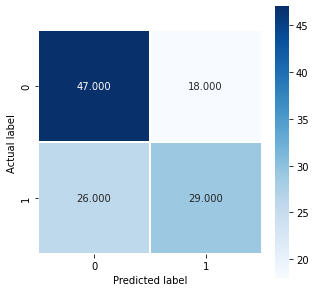

In [ ]:
label_document=[]

#"""generate array of labels"""#
for each_label in zara_df_new['text']:
    label=''
    label=label+ each_label + ' '
    label_document.append(label)  


classify(label_document)

**Only with captions**

Confusion Matrix is : 
[[51 14]
 [17 38]]

Classification Report is : 
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        65
           1       0.73      0.69      0.71        55

    accuracy                           0.74       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.74      0.74      0.74       120



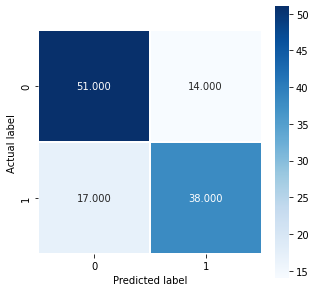

In [ ]:
caption_document=[]

for each_caption in zara_df_new['caption']:
    caption='' 
    caption=caption+ each_caption + ' '
    caption_document.append(caption)  

"""Run classification on Captions"""
classify(caption_document)

**With Captions and Image labels- Image label column name changed to 'text'**

In [ ]:
zara_df_new['caption_label']=zara_df_new['caption'] + zara_df_new['text']

Confusion Matrix is : 
[[58  7]
 [19 36]]

Classification Report is : 
              precision    recall  f1-score   support

           0       0.75      0.89      0.82        65
           1       0.84      0.65      0.73        55

    accuracy                           0.78       120
   macro avg       0.80      0.77      0.78       120
weighted avg       0.79      0.78      0.78       120



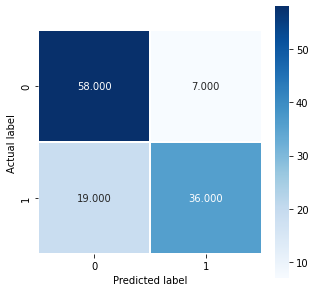

In [ ]:
caption_label_document=[]
for each_caption in zara_df_new['caption_label']:
    caption='' 
    caption=caption+ each_caption + ' '
    caption_label_document.append(caption)  

"""Run classification on caption and labels"""
classify(caption_label_document)

**Analysis from Logistic Regression** 

*   We can see that the highest accuracy is achieved when we combine the captions with the image labels(renamed as text), which is 78%.

*   Using Logistic Regression with only image labels gives us the lowest accuracy of 62%. Using only post-captions gives us an accuracy of 74%
*   The engagement level for any image is visibly higher when we are adding the image labels together with captions.

Thus engagement can be successfully predicted by using both the content of the captions and the image labels, implying the importance of both of them.

Currently, one of the things that Zara might need to focus on is how to increase the engagement level by only using the image labels. They can do so by using the technique of split testing or bucket testing, commonly referred as A/B testing and then track the analytics of click rate .

Interestingly,the captions adds a lot of boost in the engagement prediction.This suggests that along with the content of the picture, Zara is also providing some additional insights through the captions that seems to have a positive impact on the engagement level.

***Indeed, a picutre is worth a thousand words!***










**Task E : Perform topic modeling (LDA) on the original image_labels.**

In [ ]:
zara_df_E= zara_df.copy()  
zara_df_E.head()


,Unnamed: 0,post_link,comment_count,likes_count,caption,is_video,image_link,image_labels,binary
0,0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Sky, Hat, People in nature, Sun hat, Happy, G...",0
1,1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Smile, Facial expression, Sky, Happy, Flash p...",0
2,2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar...",0
3,3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ...",0
4,4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi...",0


In [ ]:
# for i in range(600):
#   labels_list=[]
#   labels_list.append(zara_df['image_labels'][i])
#   zara_df_E['image_labels'][i]= labels_list[0]
# print(zara_df_E.loc[0])
#print(zara_df_E['image_labels'][i])
#zara_df_E.tail()

In [ ]:
#zara_df_E = df_zara_df_E.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
zara_df_E = zara_df_E.drop(['Unnamed: 0'],axis=1)
data_labels = zara_df_E[['image_labels']]
data_labels['index'] = data_labels.index
print(len(data_labels))
data_labels[:10]

600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,image_labels,index
0,"[Sky, Hat, People in nature, Sun hat, Happy, G...",0
1,"[Smile, Facial expression, Sky, Happy, Flash p...",1
2,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar...",2
3,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ...",3
4,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi...",4
5,"[Lip, Outerwear, Eyebrow, Cap, White, Black, F...",5
6,"[Forehead, Nose, Cheek, Lip, Eyebrow, Eye, Eye...",6
7,"[Forehead, Nose, Cheek, Smile, Eyebrow, Black,...",7
8,"[Jeans, Musical instrument, Band plays, Drum, ...",8
9,"[Shoe, Leg, Black, Plant, People in nature, Bl...",9


In [ ]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result



In [ ]:
doc_sample = data_labels[data_labels['index'] == 1].values[0][0]
print(doc_sample)
print('original document: ')
words = []
for word in doc_sample:
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
#print(preprocess(doc_sample))

#processed_docs = data_labels['image_labels'].map(preprocess)
processed_docs = data_labels['image_labels']
processed_docs[:10]

['Smile', 'Facial expression', 'Sky', 'Happy', 'Flash photography', 'Travel', 'People in nature', 'Fun', 'Leisure', 'Family taking photos together']
original document: 
['Smile', 'Facial expression', 'Sky', 'Happy', 'Flash photography', 'Travel', 'People in nature', 'Fun', 'Leisure', 'Family taking photos together']


 tokenized and lemmatized document: 


0    [Sky, Hat, People in nature, Sun hat, Happy, G...
1    [Smile, Facial expression, Sky, Happy, Flash p...
2    [Outerwear, Arm, Neck, Sleeve, Gesture, Collar...
3    [Face, Smile, Head, Outerwear, Arm, Eye, Produ...
4    [Toy, Sleeve, Waist, Collar, Bag, Fashion desi...
5    [Lip, Outerwear, Eyebrow, Cap, White, Black, F...
6    [Forehead, Nose, Cheek, Lip, Eyebrow, Eye, Eye...
7    [Forehead, Nose, Cheek, Smile, Eyebrow, Black,...
8    [Jeans, Musical instrument, Band plays, Drum, ...
9    [Shoe, Leg, Black, Plant, People in nature, Bl...
Name: image_labels, dtype: object

**Bag of words**

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 Fun
1 Gesture
2 Happy
3 Hat
4 Landscape
5 Military camouflage
6 People in nature
7 Sky
8 Sun hat
9 Travel
10 Facial expression


In [ ]:
dictionary.filter_extremes(no_below=7, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[310]

processed_docs[310]

['Hand',
 'Sky',
 'Cloud',
 'People in nature',
 'Flash photography',
 'Happy',
 'Standing',
 'Black-and-white',
 'Gesture',
 'Style']

In [ ]:
np.random.seed(2020)
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=8, workers=2)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.098*"Sleeve" + 0.068*"Waist" + 0.065*"Neck" + 0.054*"Street fashion" + 0.044*"Shoulder" + 0.038*"Flash photography" + 0.035*"Knee" + 0.034*"Thigh" + 0.033*"Leg" + 0.030*"Outerwear"
Topic: 1 
Words: 0.083*"Lip" + 0.071*"Eyelash" + 0.059*"Eyebrow" + 0.044*"Nose" + 0.041*"Forehead" + 0.038*"Skin" + 0.036*"Chin" + 0.031*"Font" + 0.030*"Cheek" + 0.030*"Eye"
Topic: 2 
Words: 0.046*"Sky" + 0.045*"People in nature" + 0.042*"Flash photography" + 0.038*"Plant" + 0.036*"Happy" + 0.034*"Leg" + 0.030*"Shoe" + 0.027*"Fashion" + 0.026*"Standing" + 0.024*"White"
Topic: 3 
Words: 0.050*"Flash photography" + 0.047*"Happy" + 0.033*"Gesture" + 0.031*"Head" + 0.029*"Face" + 0.029*"Vision care" + 0.029*"Smile" + 0.028*"Sunglasses" + 0.026*"Sky" + 0.026*"Eyewear"


In [ ]:
x=lda_model.show_topics()

def Convert(string): 
    li = list(string.split("  ")) 
    return li 

twords={}
for topic,word in x:
    twords[topic]=Convert(re.sub('[^A-Za-z ]+','', word))
    print('Topic words:',topic,'\nWords:',twords[topic])
    
terms_df = pd.DataFrame([twords])
terms_df = terms_df.transpose()
terms_df.index.name = 'Topic'
terms_df.columns = ['Words']
terms_df.to_csv('words_loading_on_topics.csv')

Topic words: 0 
Words: ['Sleeve', 'Waist', 'Neck', 'Street fashion', 'Shoulder', 'Flash photography', 'Knee', 'Thigh', 'Leg', 'Outerwear']
Topic words: 1 
Words: ['Lip', 'Eyelash', 'Eyebrow', 'Nose', 'Forehead', 'Skin', 'Chin', 'Font', 'Cheek', 'Eye']
Topic words: 2 
Words: ['Sky', 'People in nature', 'Flash photography', 'Plant', 'Happy', 'Leg', 'Shoe', 'Fashion', 'Standing', 'White']
Topic words: 3 
Words: ['Flash photography', 'Happy', 'Gesture', 'Head', 'Face', 'Vision care', 'Smile', 'Sunglasses', 'Sky', 'Eyewear']


In [ ]:
processed_docs[300]

['Shoulder',
 'Cap',
 'Building',
 'Azure',
 'Street fashion',
 'Sleeve',
 'Glove',
 'Waist',
 'Cool',
 'Beard']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[300]], key=lambda tup: -1*tup[1]):
    print("\nScore {} \nTopic: {}".format(score, index))




Score 0.6891964077949524 
Topic: 0

Score 0.2588323950767517 
Topic: 2

Score 0.026592859998345375 
Topic: 3

Score 0.025378312915563583 
Topic: 1


**Topic weights**

In [ ]:
for i in range(0,len(bow_corpus)):
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: -1*tup[1]):
        arr = "Topic "+ str(index)
        data_labels.loc[i,arr]= score

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#Displaying topic weights for each label
data_labels[300:301]

,image_labels,index,Topic 3,Topic 2,Topic 0,Topic 1
300,"[Shoulder, Cap, Building, Azure, Street fashio...",300,0.026605,0.258802,0.689214,0.025378


In [ ]:
# This bit gives out the best topic match for each document and the corresponding score
def format_topics_sentences(lda_model=None, corpus=bow_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(lda_model[bow_corpus]):
        row = row_list[0] if lda_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9139,"Flash photography, Happy, Gesture, Head, Face,...","[Sky, Hat, People in nature, Sun hat, Happy, G..."
1,1,3.0,0.9230,"Flash photography, Happy, Gesture, Head, Face,...","[Smile, Facial expression, Sky, Happy, Flash p..."
2,2,0.0,0.9310,"Sleeve, Waist, Neck, Street fashion, Shoulder,...","[Outerwear, Arm, Neck, Sleeve, Gesture, Collar..."
3,3,3.0,0.6856,"Flash photography, Happy, Gesture, Head, Face,...","[Face, Smile, Head, Outerwear, Arm, Eye, Produ..."
4,4,0.0,0.9050,"Sleeve, Waist, Neck, Street fashion, Shoulder,...","[Toy, Sleeve, Waist, Collar, Bag, Fashion desi..."
5,5,1.0,0.4520,"Lip, Eyelash, Eyebrow, Nose, Forehead, Skin, C...","[Lip, Outerwear, Eyebrow, Cap, White, Black, F..."
6,6,1.0,0.9285,"Lip, Eyelash, Eyebrow, Nose, Forehead, Skin, C...","[Forehead, Nose, Cheek, Lip, Eyebrow, Eye, Eye..."
7,7,1.0,0.9167,"Lip, Eyelash, Eyebrow, Nose, Forehead, Skin, C...","[Forehead, Nose, Cheek, Smile, Eyebrow, Black,..."
8,8,0.0,0.6144,"Sleeve, Waist, Neck, Street fashion, Shoulder,...","[Jeans, Musical instrument, Band plays, Drum, ..."
9,9,2.0,0.9292,"Sky, People in nature, Flash photography, Plan...","[Shoe, Leg, Black, Plant, People in nature, Bl..."


In [ ]:
data_labels['image_URL'] = zara_df_E['image_link']

cols = ['image_URL','image_labels','index','Topic 1','Topic 2','Topic 3']
data_labels[cols].to_csv('topics_and_weights.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
zara_df_E.head(200)

,post_link,comment_count,likes_count,caption,is_video,image_link,image_labels,binary
0,https://instagram.com/p/CWJOENGNxbJ/,138,18882,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Sky, Hat, People in nature, Sun hat, Happy, G...",0
1,https://instagram.com/p/CWIkys4tab0/,115,30783,Una splendida giornata #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Smile, Facial expression, Sky, Happy, Flash p...",0
2,https://instagram.com/p/CVnpS7ntzH_/,243,30694,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Outerwear, Arm, Neck, Sleeve, Gesture, Collar...",0
3,https://instagram.com/p/CVnVR6Ytzjr/,133,23152,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Face, Smile, Head, Outerwear, Arm, Eye, Produ...",0
4,https://instagram.com/p/CVnL685tefr/,146,22627,ZARA KIDS+ LILMCKIMM. Now available\nâThis c...,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Toy, Sleeve, Waist, Collar, Bag, Fashion desi...",0
...,...,...,...,...,...,...,...,...
195,https://instagram.com/p/CNcuQ5DhmnZ/,566,114856,Long sequin dress. Limited edition #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Sky, Beach, Wood, Gesture, Plant, Body...",1
196,https://instagram.com/p/CNcZK3xhxyw/,612,166220,Pointelle knit dress #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Water, Hand, Sky, Arm, Shoulder, Eye, Cloud, ...",1
197,https://instagram.com/p/CNSsHU7h71-/,412,66427,PRINCEâ¢ï¸ VS ZARA collection #zarawoman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Shoe, Shoulder, Arm, Leg, Product, Azu...",1
198,https://instagram.com/p/CNSXB1lBObG/,185,28555,PRINCEâ¢ï¸ VS ZARA collection #zaraman,False,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,"[Joint, Hand, White, Muscle, Azure, Neck, Slee...",0


In [ ]:
data_labels['likes_count']= zara_df_E['likes_count']
data_labels =data_labels.sort_values(by=['likes_count'])
data_labels.tail()

,image_labels,index,Topic 3,Topic 2,Topic 0,Topic 1,image_URL,likes_count
114,"[Water, Sky, People on beach, Leg, People in n...",114,0.028702,0.911481,0.031900,0.027918,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,220349
186,"[Bicycle, Dog, Wheel, Tire, Leg, People in nat...",186,0.028082,0.915419,0.028689,0.027810,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,225781
61,"[Footwear, Face, Joint, Hand, Shoe, Shoulder, ...",61,0.024073,0.577227,0.375087,0.023613,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,232212
169,"[Forehead, Nose, Hair, Cheek, Skin, Lip, Color...",169,0.025289,0.025178,0.025471,0.924062,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,253251
267,"[Shoe, Snow, Outerwear, Helmet, White, Glove, ...",267,0.037800,0.194306,0.731318,0.036577,https://instagram.fyvr4-1.fna.fbcdn.net/v/t51....,272854


In [ ]:
data_labels.likes_count.quantile([0.25,0.5,0.75])

0.25    43313.75
0.50    57117.50
0.75    80676.25
Name: likes_count, dtype: float64

In [ ]:
# Splitting the data into two quartiles for the lowest and highest likes
quart_25 = data_labels[data_labels['likes_count']<43313.75] #lowest
quart_75 = data_labels[data_labels['likes_count']>80676.25] #highest

#Average of topic weights in each of these quartiles
avg_low = pd.DataFrame(quart_25[['Topic 0','Topic 1','Topic 2','Topic 3']].mean())
avg_low = avg_low.transpose()

avg_high = pd.DataFrame(quart_75[['Topic 0','Topic 1','Topic 2','Topic 3']].mean())
avg_high = avg_high.transpose()

In [ ]:
likes_count_high_and_low = avg_low.append(avg_high,ignore_index=True)
likes_count_high_and_low['likes_levels'] = ['Low likes','High likes']
likes_count_high_and_low.set_index('likes_levels',inplace=True)
likes_count_high_and_low.rename(columns = {"Topic 0": "Body", "Topic 1": "Face", "Topic 2": "Nature", "Topic 3": "Eye wear"})

,Body,Face,Nature,Eye wear
likes_levels,,,,
Low likes,0.349710,0.326037,0.126422,0.197831
High likes,0.504933,0.128857,0.237821,0.128389


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

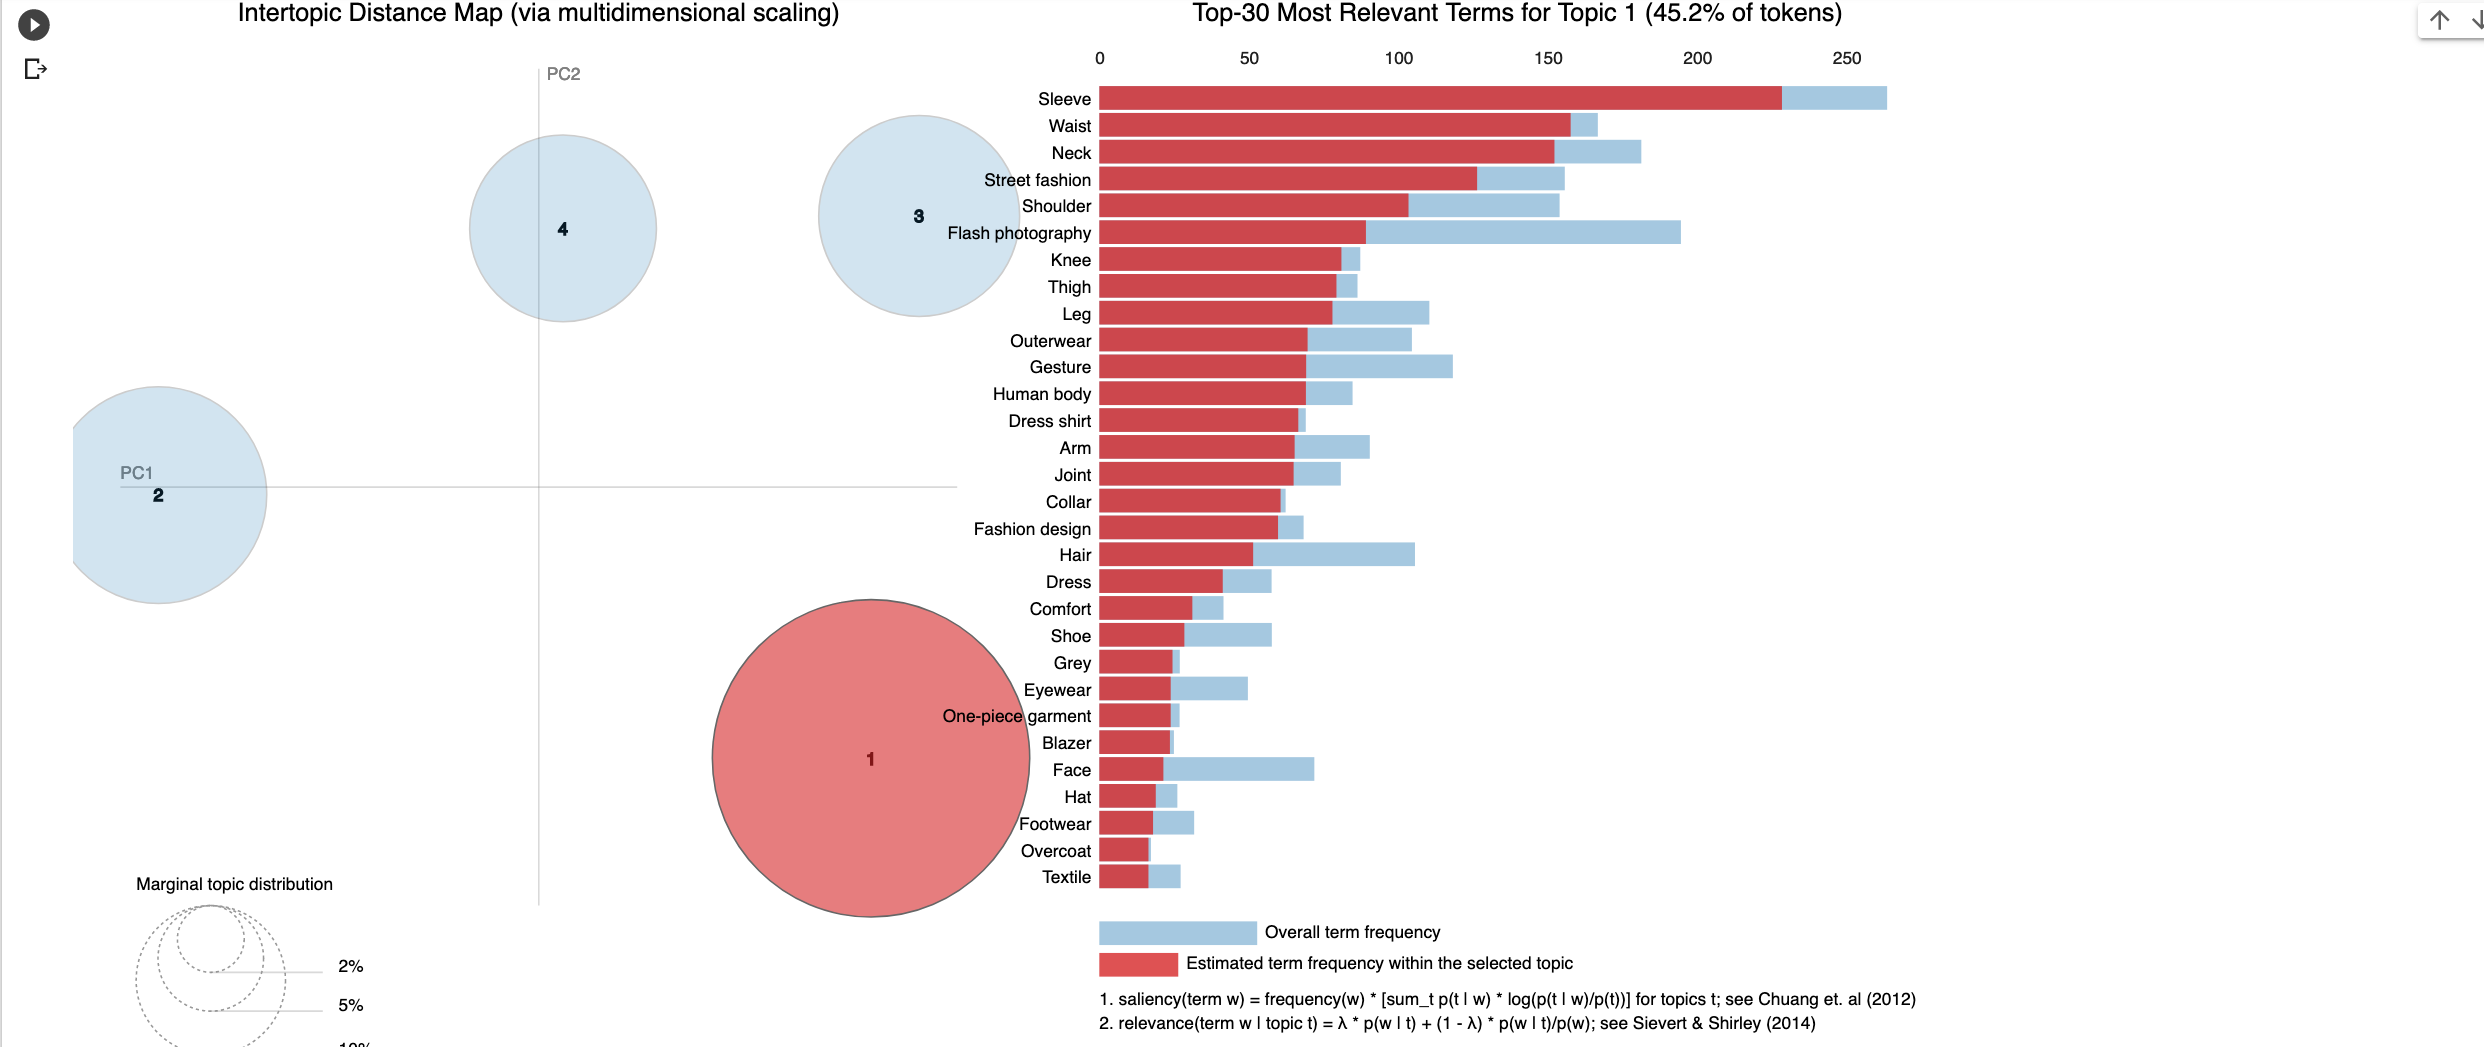

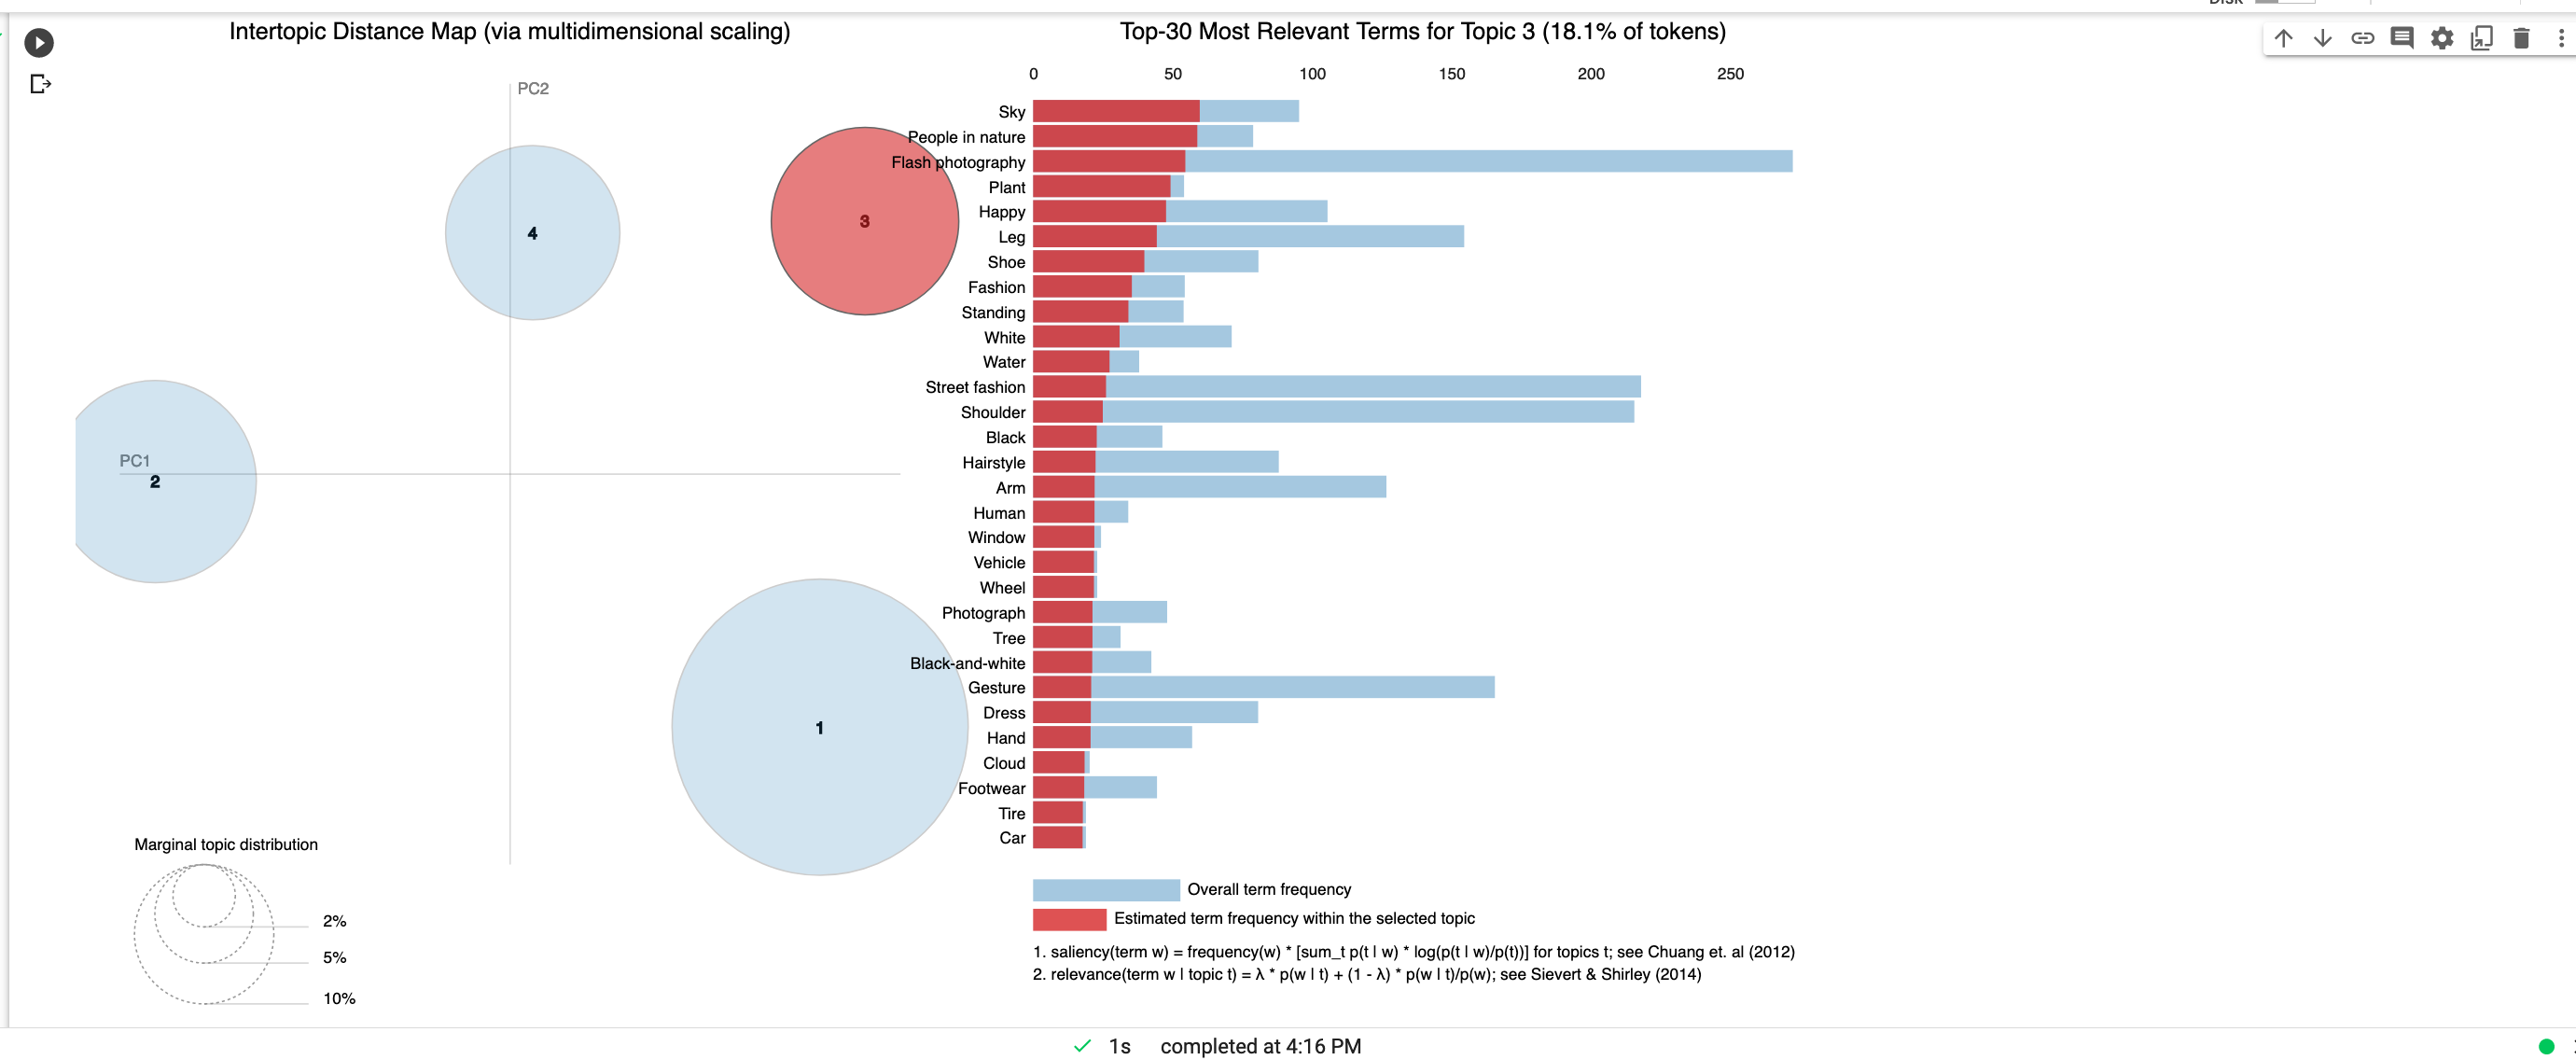

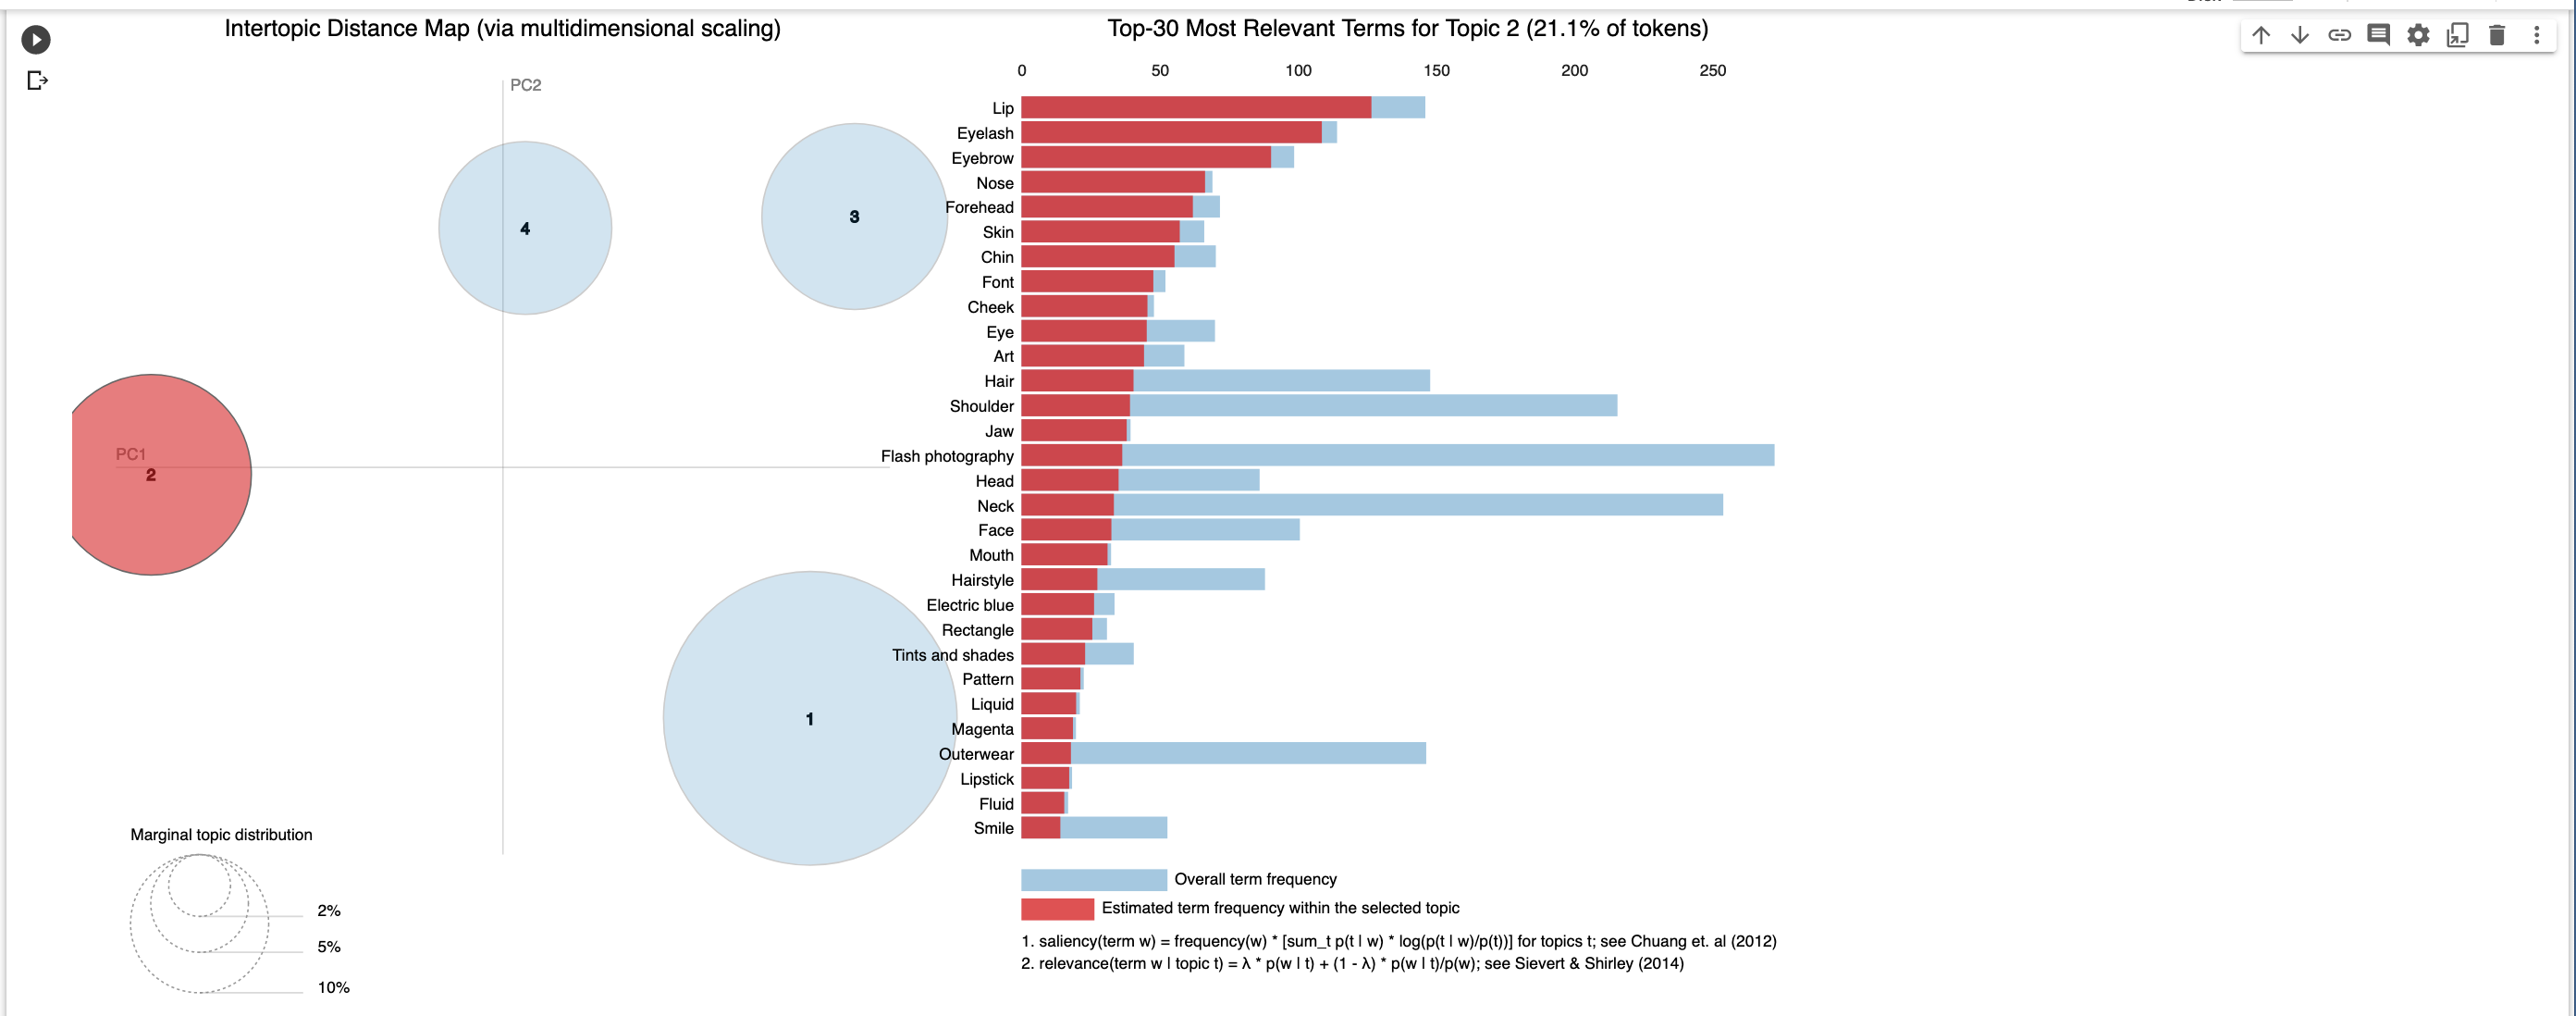

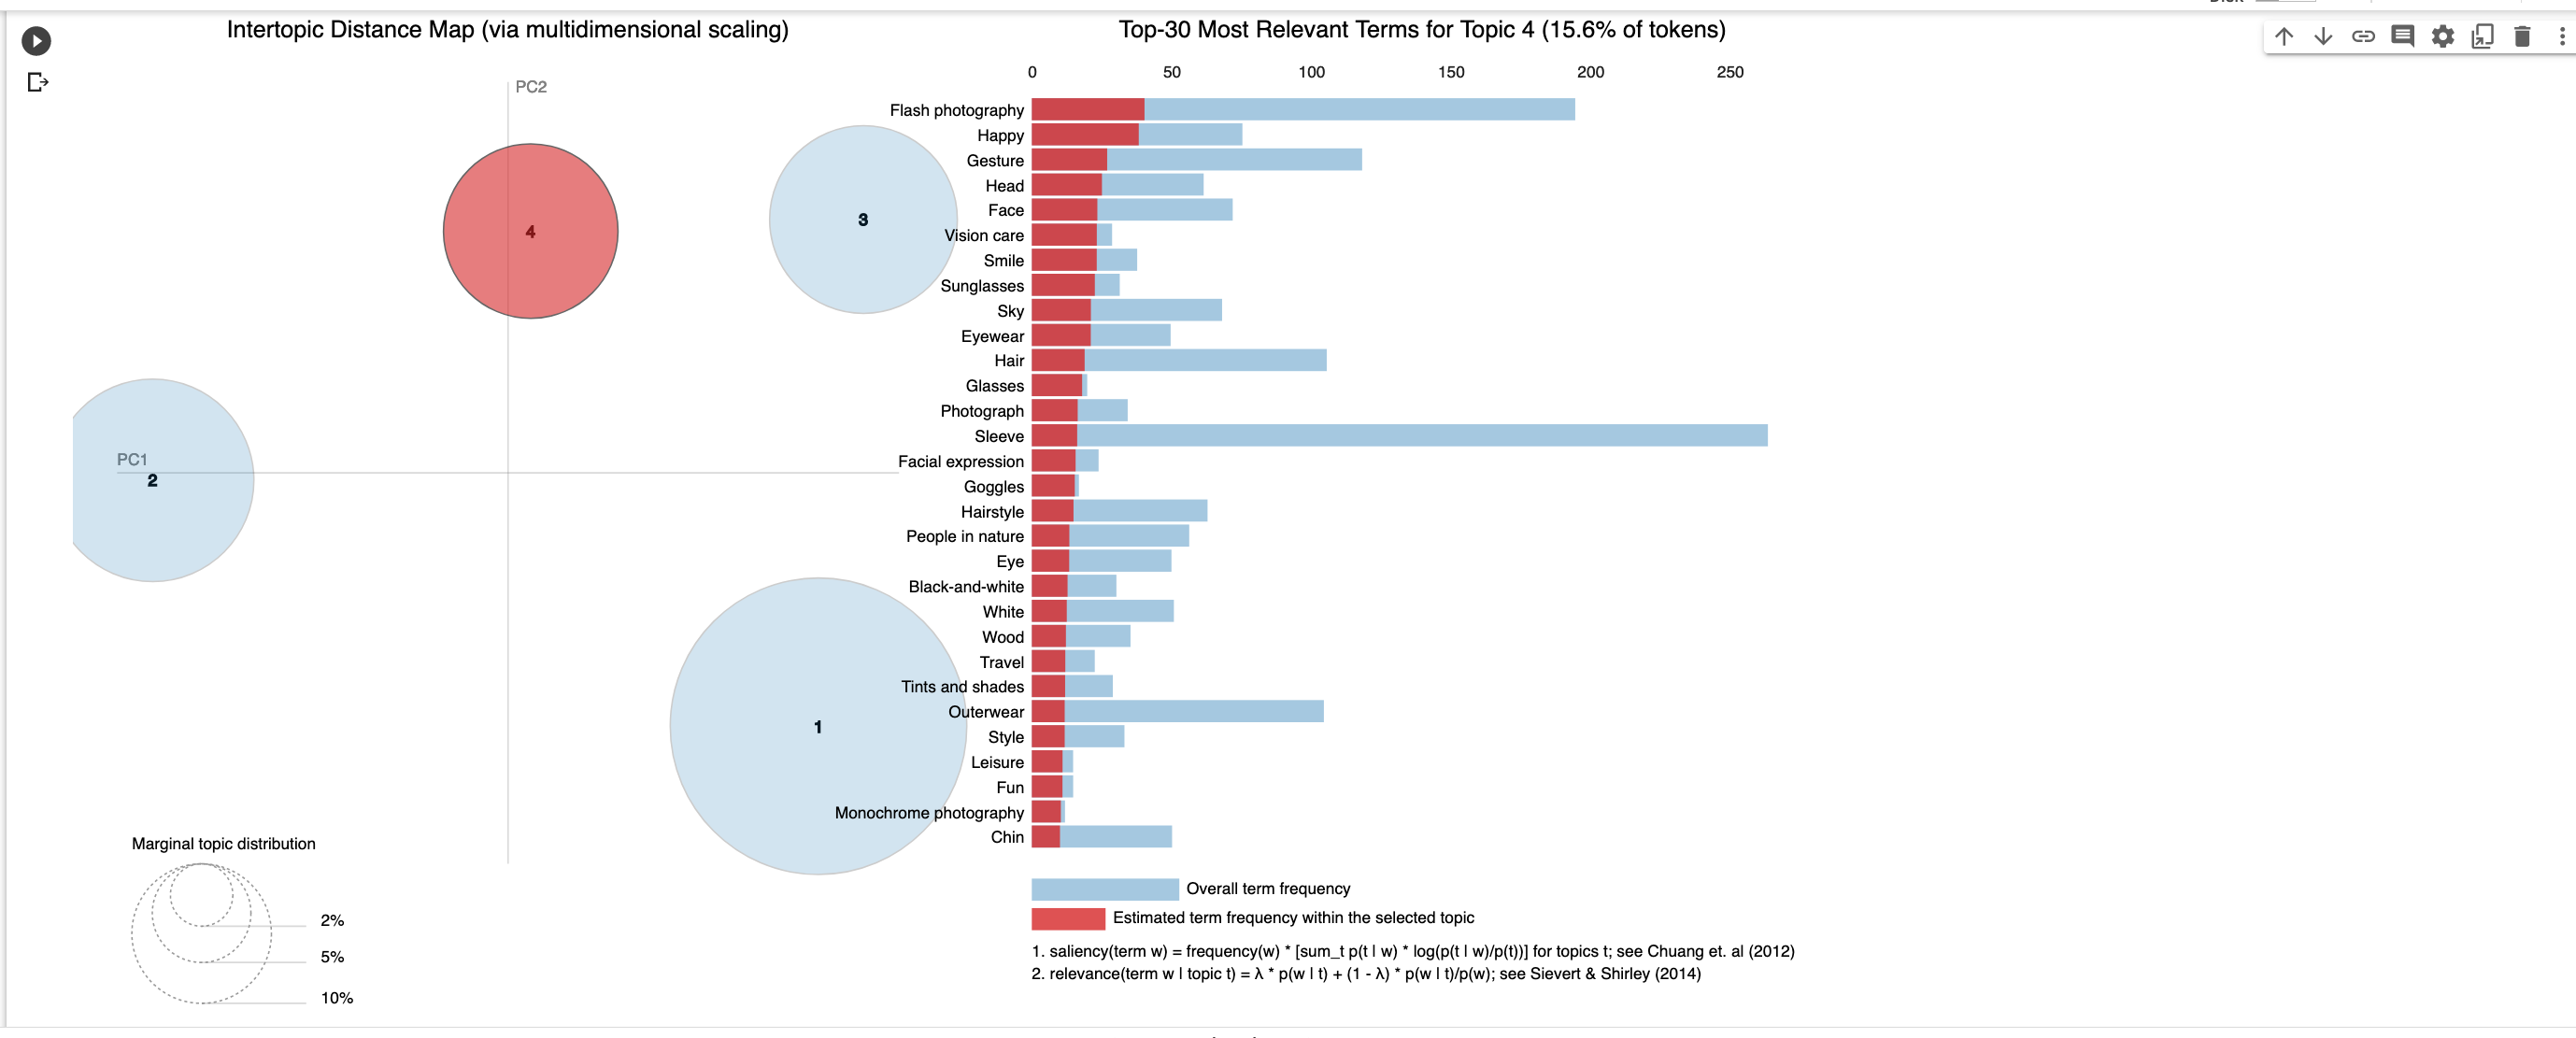

**Task F : What advice would you give Zara if it wants to increase engagement**

What advice would you give Zara if it wants to increase engagement on its Instagram page based on your findings?   

Based on the topic modeling findings, we can see that many of our posts fall under the main category body and outfits or wearables in general. There are many overlaps within these topics, given that most are related to fashion, outfits, body images. People expect these kind of photos from Zara, and these photos are probably the reason they are actively following the account.However there is always room to engage with new user base through one of the most popular social media platforms-Instagram, which is why we recommend to add in a mix of new images corresponding to diverse topics.

Based on the number of likes we can see that the topic "Body" has the highest 
score followed by "Nature". It is safe to assume that users on Instagram, mostly young crowd, are generally more likely to be interested in taking good photos – they are, after all, browsing the social media platform to see images and when it comes to a brand like Zara , see more glossy and glamorous pictures! So Zara can group these together by finding new perspectives in photographing their models and also use some natural settings , since "Nature" also seems to have high percentage of likes.

Suprisingly the topic "Body" also has considerably high percentage of low likes.One of the reasons could be people’s Instagram feeds are oversaturated with the images having some of the features included in the topic-"Body".Zara should reduce the number of posts containing the features included in "Body" to a maximum limit per week. Limiting the saturation of these images on people’s feeds might encourage more engagement with the posts in general.

The topic-"Face" also has a high percentage of low likes , which suggests that Zara needs to focus on more innovative and diverse surroundings which highlights the outfits in more natural , glamourous and embellished  envirnoment instead of just showing headshots or full face close ups.

The topic-"Eye wear" has high score for low likes ,so may be customers do not like the presentation of vision wear products. Glasses or Eye wear in general act as an accessory to the whole outfit, hence people are looking for images that can express an integrated sense of fashion.Hence they can provide overall fashion matching solutions base on the accessories like eyewears instead of highlighting only the product itself.

 


**Our analysis found a positive correlation between likes and topic words 0 & 2.**

Topic words: 0 
Words: ['Neck', 'Shoulder', 'Lip', 'Hair', 'Flash photography', 'Sleeve', 'Joint', 'Human body', 'Arm', 'Eyelash']

Topic words: 2 
Words: ['Flash photography', 'Happy', 'Sky', 'People in nature', 'Gesture', 'Standing', 'Blackandwhite', 'Style', 'Black', 'Sleeve']

Thus images having attributes mentioned in both "Body" and "Nature" is the key to getting high likes. After taking a close look at those posts, customers love high fashion photography, in which models wear fashionable outfits and are posing surrounded by nature.Posting more photos taken in the outdoor scene like city view ,vactaion resorts will also resonate more instead of just posting catalogue pictures.

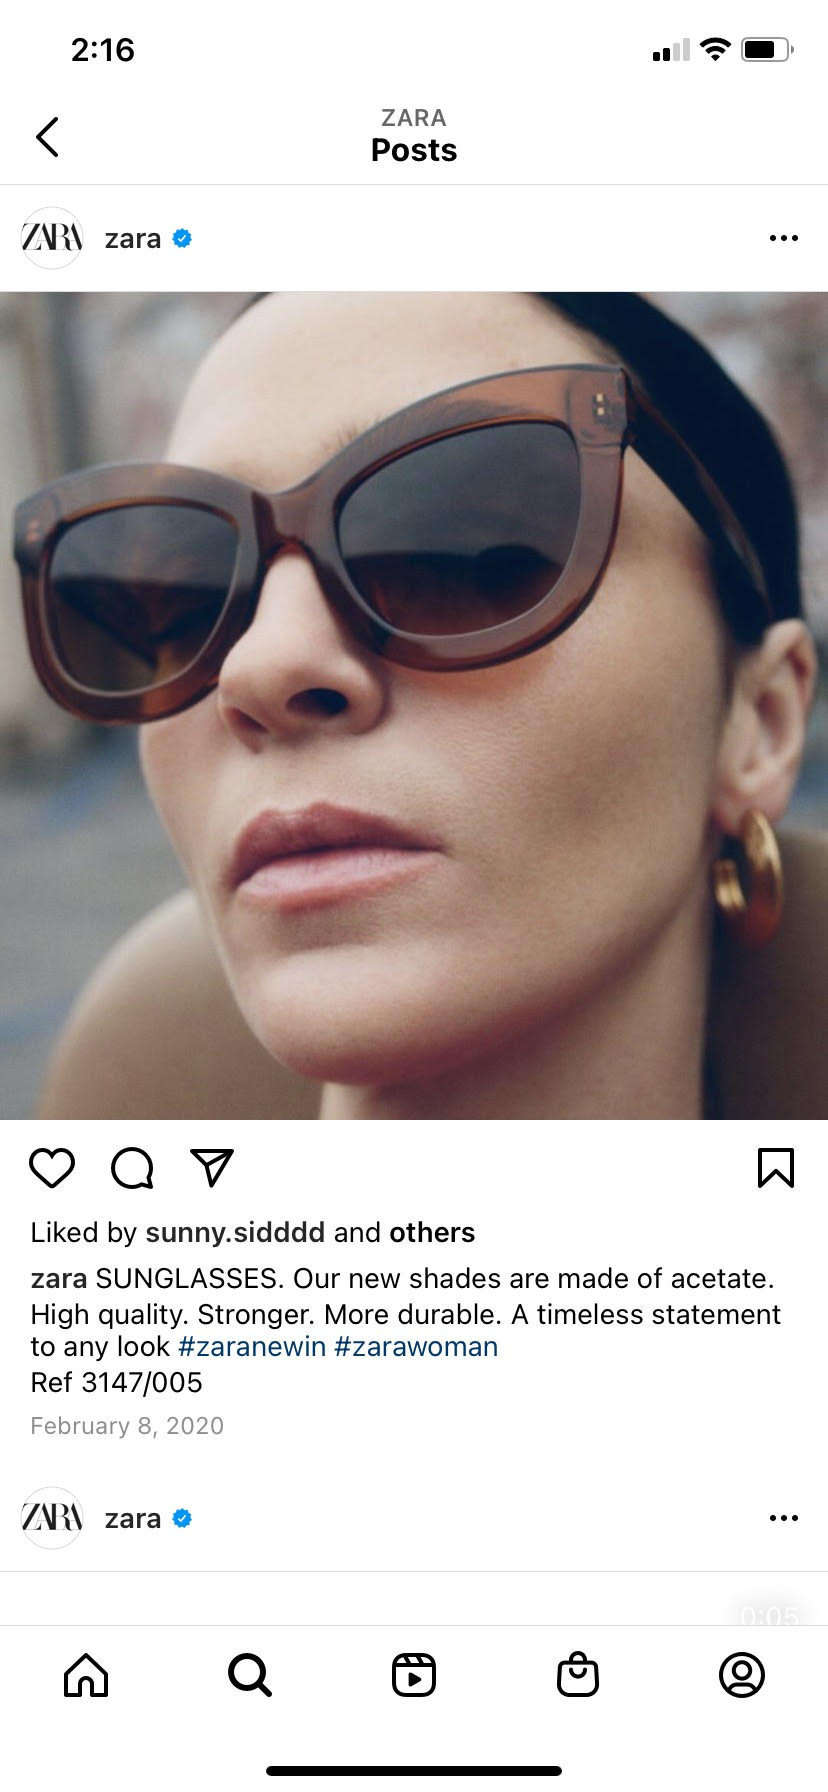

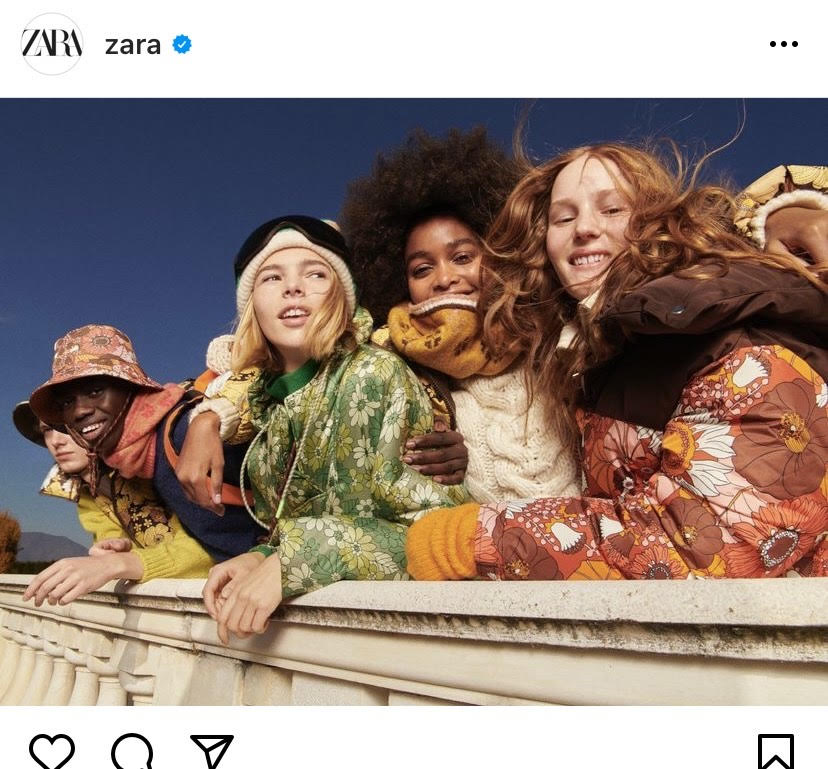